In [1]:
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns
from datetime import datetime
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显
plt.rc('axes',axisbelow=True)

In [7]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
#sns.set_style('whitegrid')
import h5py
from PIL import Image
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd ..

/Users/james/Desktop/Projects/ml_strategy


In [8]:
df = pd.read_csv('data/BTC.csv')
df['date']=[datetime.strptime(d, '%Y/%m/%d').date() for d in df['date']]
df['price']=(df['high']+df['low'])/2
df.head(5)

date    open    high     low   close       value    price
0  2013-04-28  135.30  135.98  132.10  134.21  1488566728  134.040
1  2013-04-29  134.44  147.49  134.00  144.54  1603768865  140.745
2  2013-04-30  144.00  146.93  134.05  139.00  1542813125  140.490
3  2013-05-01  139.00  139.89  107.72  116.99  1298954594  123.805
4  2013-05-02  116.38  125.60   92.28  105.21  1168517495  108.940

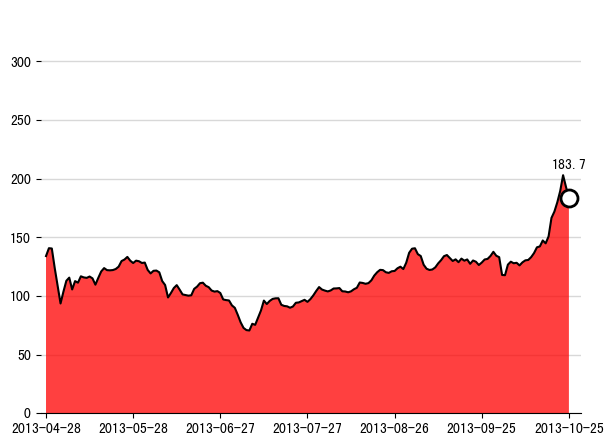

In [9]:
Span = 180
N_Span=0
df_temp=df.loc[N_Span*Span:(N_Span+1)*Span,:]
df_temp.head(5)
fig =plt.figure(figsize=(6,4), dpi=100)
plt.subplots_adjust(top=1,bottom=0,left=0,right=0.9,hspace=0,wspace=0)

plt.fill_between(df_temp.date.values, y1=df_temp.price.values, y2=0,alpha=0.75, facecolor='r', linewidth=1,edgecolor ='none',zorder=1)
plt.plot(df_temp.date, df_temp.price, color='k',zorder=2)
plt.scatter(df_temp.date.values[-1], df_temp.price.values[-1], color='white',s=150,edgecolor ='k',linewidth=2,zorder=3)
plt.text(df_temp.date.values[-1], df_temp.price.values[-1]*1.18,s=np.round(df_temp.price.values[-1],1),size=10,ha='center', va='top')
plt.ylim(0, df_temp.price.max()*1.68)
plt.xticks(ticks=df_temp.date.values[0:Span+1:30],labels=df_temp.date.values[0:Span+1:30],rotation=0)
plt.margins(x=0.01)

ax = plt.gca()#获取边框
ax.spines['top'].set_color('none')    # 设置上‘脊梁’为无色
ax.spines['right'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['left'].set_color('none')   # 设置上‘脊梁’为无色
plt.grid(axis="y",c=(217/256,217/256,217/256),linewidth=1)         #设置网格线   
plt.show()

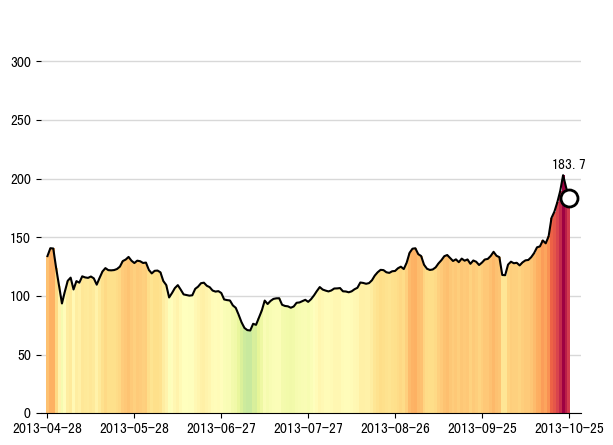

In [10]:
Span_Date =180  #日期范围宽度
Num_Date =180  #终止日期
df_temp=df.loc[Num_Date-Span_Date: Num_Date,:]  #选择从Num_Date-Span_Date开始到Num_Date的180天的数据
colors = cm.Spectral_r(df_temp.price / float(max(df_temp.price)))
fig =plt.figure(figsize=(6,4), dpi=100)
plt.subplots_adjust(top=1,bottom=0,left=0,right=0.9,hspace=0,wspace=0)
# plt.fill_between()函数：可以实现红色填充的面积图
#plt.fill_between(df_temp.date.values, y1=df_temp.price.values, y2=0,alpha=0.75, facecolor='r', linewidth=1,edgecolor ='none',zorder=1)
# plt.bar()函数：可以实现Spectral_r颜色映射的面积图
plt.bar(df_temp.date.values,df_temp.price.values,color=colors,width=1,align="center",zorder=1)
plt.plot(df_temp.date, df_temp.price, color='k',zorder=2)
plt.scatter(df_temp.date.values[-1], df_temp.price.values[-1], color='white',s=150,edgecolor ='k',linewidth=2,zorder=3)
plt.text(df_temp.date.values[-1], df_temp.price.values[-1]*1.18,s=np.round(df_temp.price.values[-1],1),size=10,ha='center', va='top')
plt.ylim(0, df_temp.price.max()*1.68)
plt.xticks(ticks=df_temp.date.values[0: Span_Date +1:30],labels=df_temp.date.values[0: Span_Date +1:30],rotation=0)
plt.margins(x=0.01)
ax = plt.gca()#获取边框
ax.spines['top'].set_color('none')   # 设置上‘脊梁’为无色
ax.spines['right'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['left'].set_color('none')   # 设置上‘脊梁’为无色
plt.grid(axis="y",c=(217/256,217/256,217/256),linewidth=1)   #设置网格线   
plt.show()

In [12]:
def draw_areachart(Num_Date=181,Span_Date=180):
    ax.clear()
    
    if Num_Date<Span_Date:
        df_temp=df.loc[0:Num_Date,:]
        baselinedf_temp = baseline_df.loc[0:Num_Date,:]
        df_span=df.loc[0:Span_Date,:]
        colors = cm.Spectral_r(df_span.price.values / float(max(df_span.price.values)))
        plt.bar(df_temp.date.values,df_temp.price.values,color=colors,width=1.5,align="center",zorder=1)
        plt.plot(df_temp.date, df_temp.price, color='k',zorder=3)
        plt.plot(baselinedf_temp.date, baselinedf_temp.price, color='b',zorder=2)
        plt.scatter(df_temp.date.values[-1], df_temp.price.values[-1], color='white',s=150,edgecolor ='k',linewidth=2,zorder=3)
        plt.text(df_temp.date.values[-1], df_temp.price.values[-1]*1.18,s=np.round(df_temp.price.values[-1],1),
size=10,ha='center', va='top')
        plt.ylim(0, df_span.price.max()*1.68)
        plt.xlim(df_span.date.values[0], df_span.date.values[-1])
        plt.xticks(ticks=df_span.date.values[0:Span_Date+1:30],labels=df_span.date.values[0:Span_Date+1:30],rotation=0,fontsize=9)
    
    else:
        print (Num_Date,Span_Date)
        df_temp=df.loc[Num_Date-Span_Date:Num_Date,:]
        baselinedf_temp = baseline_df.loc[Num_Date-Span_Date:Num_Date,:]
        colors = cm.Spectral_r(df_temp.price / float(max(df_temp.price)))
        plt.bar(df_temp.date.values[:-2],df_temp.price.values[:-2],color=colors[:-2],width=1.5,align="center",zorder=1)
        plt.plot(df_temp.date[:-2], df_temp.price[:-2], color='k',zorder=3)

        plt.plot(baselinedf_temp.date[:-2], baselinedf_temp.price[:-2], color='b',zorder=2)
        #print (df_temp.date.values)
        plt.scatter(df_temp.date.values[-4], df_temp.price.values[-4], color='white',s=150,edgecolor ='k',linewidth=2,zorder=3)
        plt.text(df_temp.date.values[-1], df_temp.price.values[-1]*1.18,s=np.round(df_temp.price.values[-1],1),
    size=10,ha='center', va='top')
        plt.ylim(0, df_temp.price.max()*1.68)
        plt.xlim(df_temp.date.values[0], df_temp.date.values[-1])
        plt.xticks(ticks=df_temp.date.values[0:Span_Date+1:30],labels=df_temp.date.values[0:Span_Date+1:30],rotation=0,fontsize=9)    

    plt.margins(x=0.2)
    ax.spines['top'].set_color('none')  # 设置上‘脊梁’为红色
    ax.spines['right'].set_color('none')  # 设置上‘脊梁’为无色
    ax.spines['left'].set_color('none')  # 设置上‘脊梁’为无色
    plt.grid(axis="y",c=(217/256,217/256,217/256),linewidth=1)         #设置网格线  
    plt.text(0.01, 0.95,"BTC 价格($)",transform=ax.transAxes, size=10, weight='light', ha='left')
    ax.text(-0.07, 1.03, '2013 to 2019 BTC price',transform=ax.transAxes, size=17, weight='light', ha='left')

In [13]:
baseline_df = df.iloc[:,np.array([0,-1])]
baseline_df['price'] =  baseline_df['price']-np.random.randint(10,20,size=baseline_df.shape[0])

In [14]:
baseline_df.head()

date    price
0  2013-04-28  120.040
1  2013-04-29  129.745
2  2013-04-30  127.490
3  2013-05-01  107.805
4  2013-05-02   97.940

In [15]:
df.head()

date    open    high     low   close       value    price
0  2013-04-28  135.30  135.98  132.10  134.21  1488566728  134.040
1  2013-04-29  134.44  147.49  134.00  144.54  1603768865  140.745
2  2013-04-30  144.00  146.93  134.05  139.00  1542813125  140.490
3  2013-05-01  139.00  139.89  107.72  116.99  1298954594  123.805
4  2013-05-02  116.38  125.60   92.28  105.21  1168517495  108.940

In [16]:
Num_Date = 180
Span_Date = 180

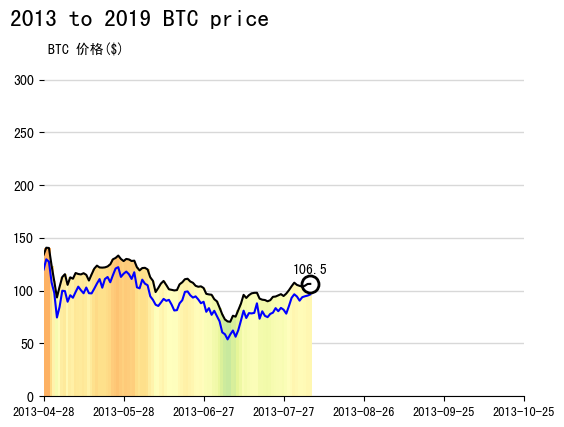

In [17]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
plt.subplots_adjust(top=1,bottom=0.1,left=0.1,right=0.9,hspace=0,wspace=0)  
draw_areachart(100,180)

In [98]:
Num_Date,Span_Date

(180, 180)

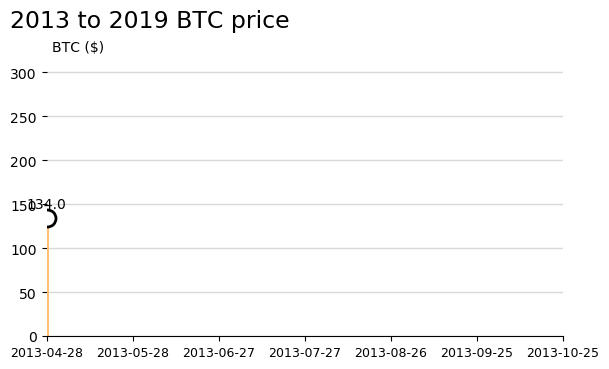

In [102]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
plt.subplots_adjust(left=0.12, right=0.98, top=0.85, bottom=0.1,hspace=0,wspace=0)  
animator = animation.FuncAnimation(fig, draw_areachart, frames=np.arange(0,180,1),interval=100)
animator.save('animation.mp4')
HTML(animator.to_jshtml())

In [100]:
#animator.save('animation.gif')
animator.save('animation.mp4')

Error in callback <function flush_figures at 0x115083378> (for post_execute):


KeyboardInterrupt: 

In [101]:
animator